In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv("../Dataset/Movie_classification.csv", header = 0)

In [3]:
df['Time_taken'].mean()

157.39149797570855

In [4]:
df['Time_taken'].fillna(df['Time_taken'].mean(), inplace=True)

In [5]:
df = pd.get_dummies(df, columns = ['3D_available','Genre'], drop_first = True)

In [6]:
X = df.loc[:, df.columns!='Start_Tech_Oscar']

In [7]:
y = df['Start_Tech_Oscar']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

<b>Gradient Boosting</b>

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

In [10]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [12]:
accuracy_score(y_test, gbc.predict(X_test))

0.5882352941176471

In [13]:
gbc_1 = GradientBoostingClassifier(learning_rate=0.02, n_estimators=1000, max_depth=1)
gbc_1.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [16]:
accuracy_score(y_train, gbc_1.predict(X_train))

0.7623762376237624

In [17]:
accuracy_score(y_test, gbc_1.predict(X_test))

0.6176470588235294

<b> Using grid search to find the best model </b>

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
gbc_main = GradientBoostingClassifier()

In [21]:
params_grid = {'learning_rate':[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1],
               'n_estimators':[500,750,1000],
               'max_depth':[1,2,3,4,5],
    
}

In [22]:
grid_search = GridSearchCV(gbc_main, params_grid, n_jobs=-1, cv=5, scoring='accuracy')

In [23]:
grid_search.fit(X_train,y_train)

C:\Users\radhika gupta\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no...
                                                  presort='auto',
  

In [24]:
grid_search.best_params_

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 750}

In [25]:
cv_cls = grid_search.best_estimator_

In [26]:
accuracy_score(y_test, cv_cls.predict(X_test))

0.5686274509803921

In [27]:
confusion_matrix(y_test, cv_cls.predict(X_test))

array([[23, 21],
       [23, 35]], dtype=int64)

<b>Ada Boost </b>

In [38]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

In [30]:
ada_cls = AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [31]:
ada_cls.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.02,
                   n_estimators=5000, random_state=None)

In [33]:
accuracy_score(y_train, ada_cls.predict(X_train))

0.8886138613861386

In [34]:
accuracy_score(y_test, ada_cls.predict(X_test))

0.6274509803921569

In [39]:
rf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [46]:
ada_cls1= AdaBoostClassifier(rf, learning_rate=0.05, n_estimators=500)

In [47]:
ada_cls1.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=1000,
                       

In [48]:
accuracy_score(y_test, ada_cls1.predict(X_test))

0.6176470588235294

<b>XG Boost</b>

- General Parameters
- Tree related parameters
- Learning task parameters

In [49]:
import xgboost as xgb

In [50]:
xg = xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3, n_jobs=-1)

In [51]:
xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=10000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [52]:
accuracy_score(y_test, xg.predict(X_test))

0.6666666666666666

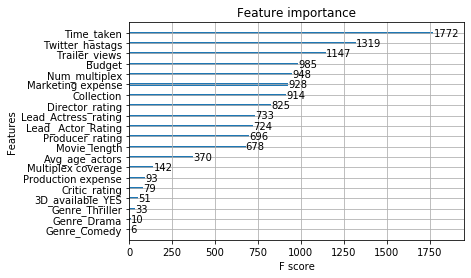

In [53]:
xgb.plot_importance(xg)

<b>Using Gridsearch for model optimization</b>

In [54]:
xg_xls = xgb.XGBClassifier(n_estimators=500, learning_rate=0.1, random_state=42)

In [56]:
params_test ={
    'max_depth':range(3,10,2),
    'gamma':[0.1,0.2,0.3],
    'subsample':[0.8,0.9],
    'colsample_bytree':[0.8,0.9],
    'reg_alpha':[1e-2, 0.1, 1],
}

In [57]:
grid_search = GridSearchCV(xg_xls, params_test, n_jobs=-1,cv=5, scoring='accuracy')

In [58]:
grid_search.fit(X_train, y_train)

C:\Users\radhika gupta\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=500, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': range(3, 10, 2),
                         'reg_

In [60]:
bestt = grid_search.best_estimator_

In [61]:
accuracy_score(y_test, bestt.predict(X_test))

0.6666666666666666

In [62]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.2,
 'max_depth': 5,
 'reg_alpha': 1,
 'subsample': 0.8}